Промежуточная аттестация 2

Задача 1 Загрузка данных

ER-диаграмма

![Тут должна быть ER-диаграмма](scr/scr1.png)

Задача 2 Подключение к БД и выполнение запросов

In [1]:
# Параметры подключения к базе данных
db_config = {
    'db_engine' : 'postgresql+psycopg2', # название БД и драйвер
    'user': 'postgres', # имя пользователя
    'password': 'parol', # пароль
    'host': 'localhost', # хост
    'port' : '5432', # порт
    'db_name' : 'postgres' # название БД
}
# Строка подключения
db_str = f"{db_config['db_engine']}://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['db_name']}"

In [2]:

from sqlalchemy import create_engine, func
from main_file import  create_table_classes # импортируем функции из файла 'main_file'
engine =  create_engine(db_str) # Создаем движок
table_classes = create_table_classes(db_str) # Динамическое создание классов для таблиц (передаем строку подключения)

Соединение с базой данных успешно установлено.
Класс для таблицы payment создан
Класс для таблицы payment_old создан
Класс для таблицы customer создан
Класс для таблицы address создан
Класс для таблицы city создан
Класс для таблицы country создан
Класс для таблицы rental создан
Класс для таблицы inventory создан
Класс для таблицы film создан
Класс для таблицы language создан
Класс для таблицы staff создан
Класс для таблицы actor создан
Класс для таблицы category создан
Класс для таблицы film_actor создан
Класс для таблицы film_category создан
Класс для таблицы store создан


Пример использования классов для работы с таблицами как объектами на примере расчета доли фильмов в каждой категории (таблица 'category')

In [3]:
from sqlalchemy.orm import sessionmaker

# Создание сессии с помощью контестного менеджера
Session = sessionmaker(bind=engine)

with Session() as session:
    # Получение классов  для таблиц
    Category = table_classes['category']
    FilmCategory = table_classes['film_category']

    # Получение общеего количества фильмов
    total_films = session.query(func.count(FilmCategory.film_id)).scalar()

    # Запрос для получения количества фильмов в каждой категории
    category_counts = (
        session.query(
            Category.name, # название категории
            func.count(FilmCategory.film_id).label('film_proportion')/ total_films * 100 # кол-во фильмов
        )
        .join(FilmCategory, FilmCategory.category_id == Category.category_id) # объединение таблиц
        .group_by(Category.name) # группировка по названию категории
        .order_by(func.count(FilmCategory.film_id)) # сортировка по количеству
        .all()
    )

    # Вывод долей фильмов в каждой категории
    print("Доля фильмов в каждой категории:")
    for category_name, proportion in category_counts:
        print(f"{category_name}: {proportion:.2f}%")

Доля фильмов в каждой категории:
Music: 5.10%
Horror: 5.60%
Travel: 5.70%
Classics: 5.70%
Comedy: 5.80%
Children: 6.00%
Sci-Fi: 6.10%
Games: 6.10%
Drama: 6.20%
New: 6.30%
Action: 6.40%
Animation: 6.60%
Documentary: 6.80%
Family: 6.90%
Foreign: 7.30%
Sports: 7.40%


Для реализации задачи далее использую прямую работу с SQL-запросами используя connection.execute.
Запросы находятся в файле /queries.txt


1. Какова доля фильмов в каждой рейтинговой категории (G, PG, PG-13, R и т.д.) в нашем ассортименте?

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from main_file import execute_query_and_save # Используем функцию из файла 'main_file'

In [5]:
df_1 = execute_query_and_save('query_1', db_str) 
print(df_1)  # Вывод данных

Данные сохранены в output_data/query_1.csv
  rating proportion
0      R      19.50
1      G      17.80
2  NC-17      21.00
3     PG      19.40
4  PG-13      22.30


2. Какие категории фильмов чаще всего арендуются клиентами?

In [6]:
df_2 = execute_query_and_save('query_2', db_str) 
print(df_2)  # Вывод данных

Данные сохранены в output_data/query_2.csv
       cat_name rent_count
0        Sports       1179
1     Animation       1166
2        Action       1112
3        Sci-Fi       1101
4        Family       1096
5         Drama       1060
6   Documentary       1050
7       Foreign       1033
8         Games        969
9      Children        945
10       Comedy        941
11          New        940
12     Classics        939
13       Horror        846
14       Travel        837
15        Music        830


3. Какова средняя продолжительность проката (rental duration) для каждой категории фильмов?

In [7]:
df_3 = execute_query_and_save('query_3', db_str) 
print(df_3)  # Вывод данных

Данные сохранены в output_data/query_3.csv
       cat_name rent_avg_time
0        Travel          5.35
1         Music          5.24
2        Family          5.17
3       Foreign          5.11
4         Drama          5.08
5         Games          5.07
6      Classics          5.07
7      Children          5.03
8        Action          4.95
9        Comedy          4.93
10    Animation          4.89
11       Sci-Fi          4.89
12       Horror          4.86
13  Documentary          4.76
14          New          4.75
15       Sports          4.72


4. Каковы тенденции в ежемесячном доходе от проката (monthly rental revenue) и продажах (sales) за прошедший год?

In [8]:
df_4 = execute_query_and_save('query_4', db_str) 
print(df_4)  # Вывод данных
# Испытал Union - работает!!!

Данные сохранены в output_data/query_4.csv
              type_record month_sales  total_sales
0  monthly rental revenue     2005.05     4824.463
1  monthly rental revenue     2005.06     9632.180
2  monthly rental revenue     2005.07    28375.227
3  monthly rental revenue     2005.08    24073.227
4                   sales     2005.05     1156.000
5                   sales     2005.06     2311.000
6                   sales     2005.07     6709.000
7                   sales     2005.08     5686.000


5. Как соотносятся показатели продаж в разных магазинах?

In [9]:
df_5 = execute_query_and_save('query_5', db_str) 
print(df_5)  # Вывод данных

Данные сохранены в output_data/query_5.csv
  store_manager_name   period  total_sales
0       Jon Stephens  2005.05   2129.80600
1       Jon Stephens  2005.08  10936.41100
2       Mike Hillyer  2006.02    283.02010
3       Mike Hillyer  2005.05   2694.61470
4       Jon Stephens  2005.06   4483.32100
5       Jon Stephens  2005.07  12635.13600
6       Mike Hillyer  2005.07  15739.85000
7       Mike Hillyer  2005.06   5148.61900
8       Mike Hillyer  2005.08  13136.58000
9       Jon Stephens  2006.02    231.16011


6. Каковы средние затраты на замену (replacement_cost) фильмов в разных жанрах?

In [10]:
df_6 = execute_query_and_save('query_6', db_str) 
print(df_6)  # Вывод данных

Данные сохранены в output_data/query_6.csv
       cat_name avg_replacement_cost
0        Sci-Fi                21.15
1         Drama                21.09
2      Classics                21.01
3        Action                20.91
4        Sports                20.40
5         Games                20.29
6     Animation                20.13
7      Children                20.06
8        Horror                19.87
9        Family                19.73
10  Documentary                19.62
11        Music                19.44
12          New                19.42
13       Travel                19.03
14       Comedy                19.02
15      Foreign                18.65


7. Какие актеры снимаются в самых разных жанрах фильмов?

In [11]:
#  На сколько я понял, нужно получить актеров у кого максимальное количество жанров. Графикоф/диаграмм тут не получится
df_7 = execute_query_and_save('query_7', db_str) 
print(df_7)  # Вывод данных

Данные сохранены в output_data/query_7.csv
   actor_full_name  cat_count
0         Uma Wood         16
1    Sean Williams         16
2   Daryl Wahlberg         16
3    Groucho Dunst         16
4   Gina Degeneres         16
5    Kevin Garland         16
6     Ewan Gooding         16
7        Ian Tandy         16
8      Harvey Hope         16
9   Michael Bolger         16
10      Reese West         16


Вывод дашборда по всем запросам (кроме №7)

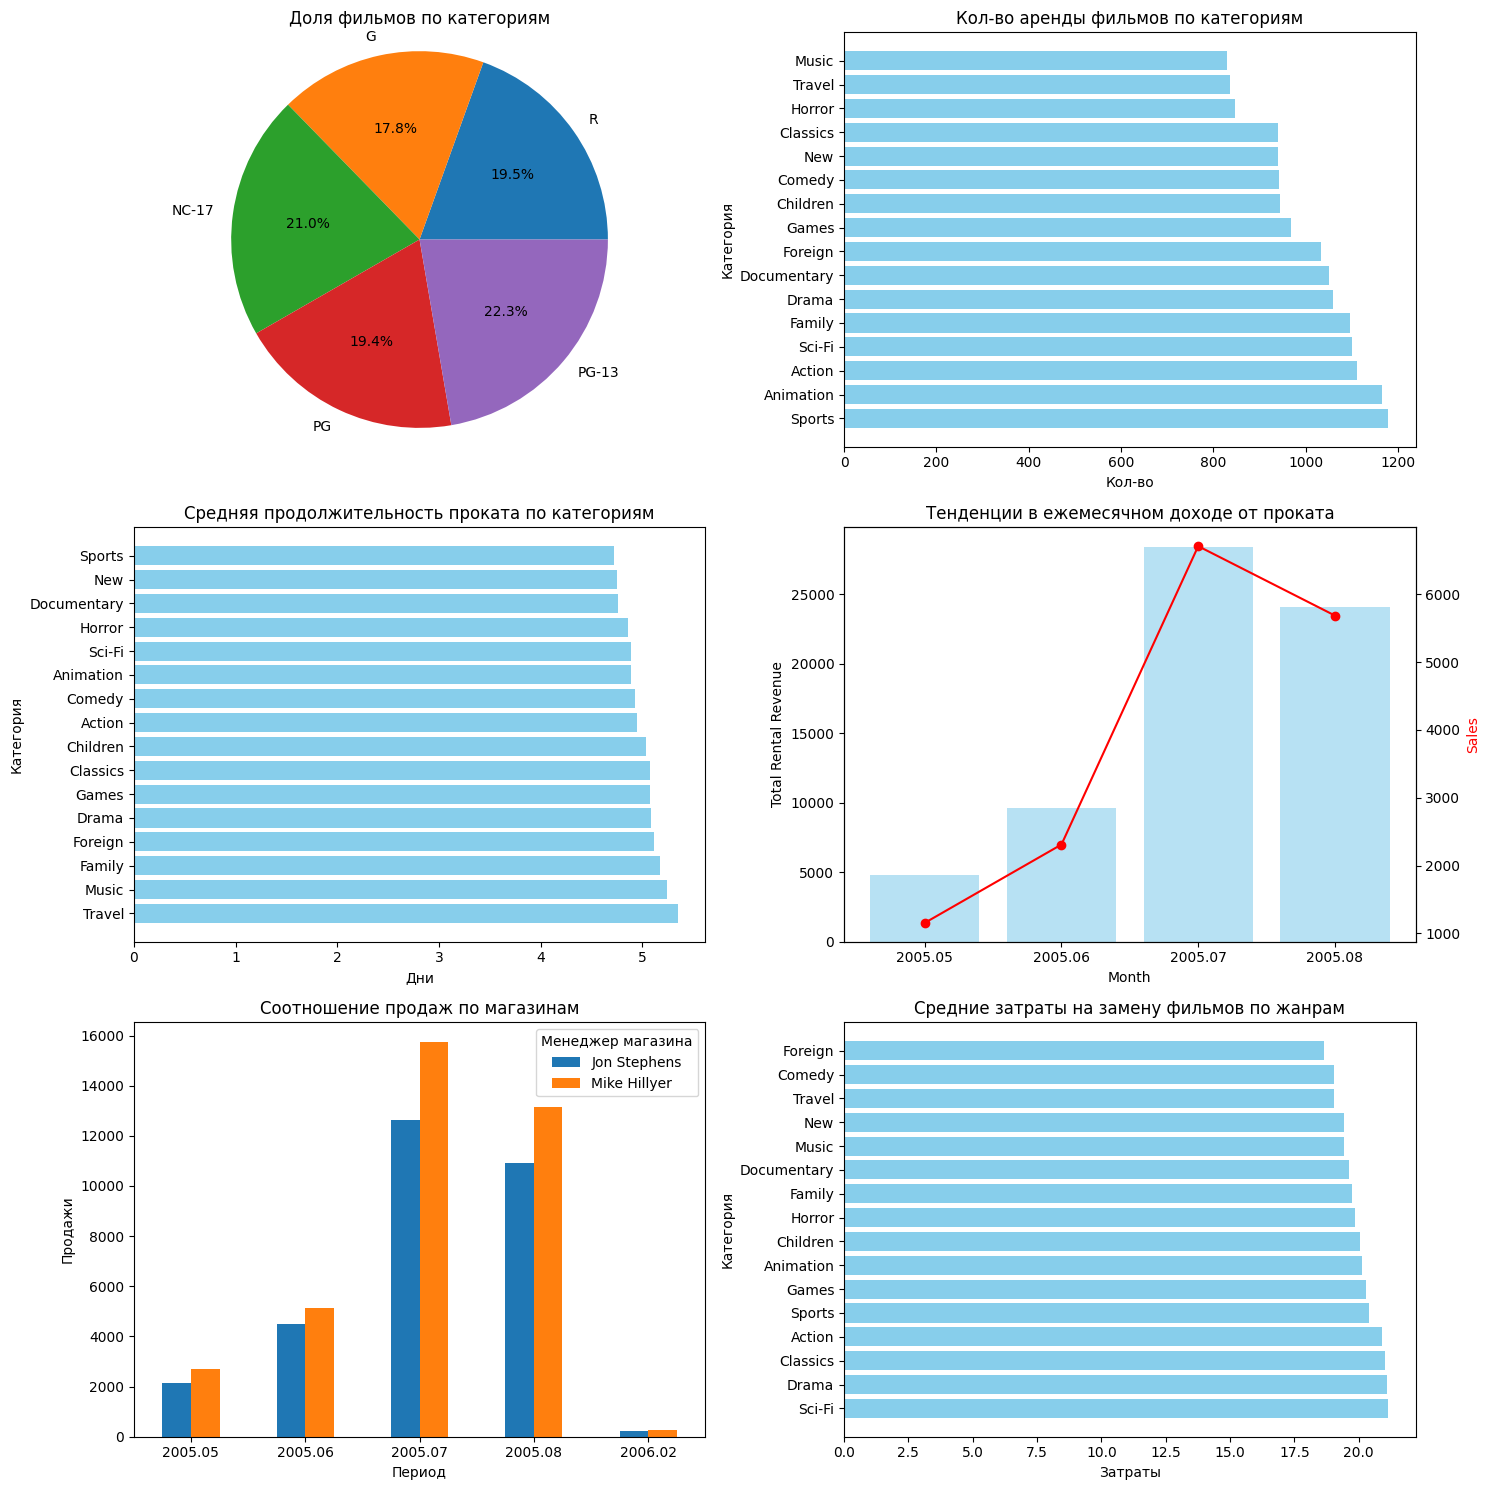

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # Создаем 3 строки и 2 колонки для графиков

# График 1 
axs[0, 0].pie(df_1['proportion'], labels=df_1['rating'], autopct='%1.1f%%')
axs[0, 0].axis("equal")
axs[0, 0].set_title('Доля фильмов по категориям')

# График 2 
axs[0, 1].barh(df_2['cat_name'], df_2['rent_count'], color='skyblue')
axs[0, 1].set_xlabel('Кол-во')
axs[0, 1].set_ylabel('Категория')
axs[0, 1].set_title('Кол-во аренды фильмов по категориям')

# График 3 
axs[1, 0].barh(df_3['cat_name'], df_3['rent_avg_time'], color='skyblue')
axs[1, 0].set_xlabel('Дни')
axs[1, 0].set_ylabel('Категория')
axs[1, 0].set_title('Средняя продолжительность проката по категориям')

# График 4 
monthly_revenue = df_4[df_4['type_record'] == 'monthly rental revenue']
axs[1, 1].bar(monthly_revenue['month_sales'], monthly_revenue['total_sales'], color='skyblue', alpha=0.6)

sales = df_4[df_4['type_record'] == 'sales']
ax2 = axs[1, 1].twinx()
ax2.plot(sales['month_sales'], sales['total_sales'], label='Sales', color='r', marker='o')

axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Total Rental Revenue')
ax2.set_ylabel('Sales', color='r')
axs[1, 1].set_title('Тенденции в ежемесячном доходе от проката')

# График 5 
df_5['total_sales'] = pd.to_numeric(df_5['total_sales'], errors='coerce')
grouped = df_5.groupby(['store_manager_name', 'period'], as_index=False).sum()
pivot_table = grouped.pivot(index='period', columns='store_manager_name', values='total_sales')

pivot_table.plot(kind='bar', ax=axs[2, 0]) 
axs[2, 0].set_title('Соотношение продаж по магазинам')
axs[2, 0].set_xlabel('Период')
axs[2, 0].set_ylabel('Продажи')
axs[2, 0].set_xticklabels(pivot_table.index, rotation=0)
axs[2, 0].legend(title='Менеджер магазина')

# График 6 
axs[2, 1].barh(df_6['cat_name'], df_6['avg_replacement_cost'], color='skyblue')
axs[2, 1].set_xlabel('Затраты')
axs[2, 1].set_ylabel('Категория')
axs[2, 1].set_title('Средние затраты на замену фильмов по жанрам')

# Уплотнение макета
plt.tight_layout()
plt.show()


-----------------------------------------------------

Задача 3. Статистический анализ и визуализация данных

In [21]:
from main_file import numeric_analysis, categorical_analysis
# Функцию из 2-й задачи, файл с данными сохраниться в query_8
df_8 = execute_query_and_save('query_8', db_str) 

# Преобразование колонок в числовой 
for column in df_8.columns:
    # Проверка типа данных колонки
    if df_8[column].dtype == 'object':  # Если это строковый тип
        # Преобразование в числовые значения, ошибки игнорируются
        numeric_column = pd.to_numeric(df_8[column], errors='coerce')
        if numeric_column.notnull().any():  # Если есть хотя бы одно число в колонке
            df_8[column] = numeric_column  # Обновление колонки только если преобразование прошло успешно
    
# Функции из main_file для анализа числовых и категориальных переменных
numeric_summary = numeric_analysis(df_8)
categorical_summary = categorical_analysis(df_8)

# Добавление разметки к результатам анализа
numeric_summary['Тип'] = 'Числовые переменные'
categorical_summary['Тип'] = 'Категориальные переменные'

# Объединение результатов анализа
analysis_results = pd.concat([numeric_summary, categorical_summary], ignore_index=True)

# Запись результатов в CSV файл
analysis_results.to_csv('output_data/analysis_results.csv', index=False)

# Вывод результата на экран
print("Анализ числовых переменных:")
print(numeric_summary)
print("\nАнализ категориальных переменных:")
print(categorical_summary)
print("\nАнализ завершен, результаты сохранены в 'analysis_results.csv'.")


Данные сохранены в output_data/query_8.csv
Анализ числовых переменных:
           Параметр  Доля пропусков  Максимальное значение  \
0      release_year             0.0                2006.00   
1   rental_duration             0.0                   7.00   
2       rental_rate             0.0                   4.99   
3  replacement_cost             0.0                  29.99   

   Минимальное значение  Среднее значение  Медиана  Дисперсия  Квантиль 0.1  \
0               2006.00       2006.000000  2006.00   0.000000       2006.00   
1                  3.00          4.986452     5.00   1.955136          3.00   
2                  0.99          2.957411     2.99   2.658524          0.99   
3                  9.99         20.017829    19.99  36.789557         11.99   

   Квантиль 0.9  Квартиль 1  Квартиль 3                  Тип  
0       2006.00     2006.00     2006.00  Числовые переменные  
1          7.00        4.00        6.00  Числовые переменные  
2          4.99        0.99      